# Week 2: Tackle Overfitting with Data Augmentation

Welcome to this assignment! As in the previous week, you will be using the famous `cats vs dogs` dataset to train a model that can classify images of dogs from images of cats. For this, you will create your own Convolutional Neural Network in Tensorflow and leverage Keras' image preprocessing utilities, more so this time around since Keras provides excellent support for augmenting image data.

You will also need to create the helper functions to move the images around the filesystem as you did last week, so if you need to refresh your memory with the `os` module be sure to take a look a the [docs](https://docs.python.org/3/library/os.html).

Let's get started!

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

Download the dataset from its original source by running the cell below. 

Note that the `zip` file that contains the images is unzipped under the `/tmp` directory.

In [2]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset

# Note: This is a very large dataset and will take some time to download

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-04-03 13:58:28--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.200.224.137, 2600:1407:f800:4a5::e59, 2600:1407:f800:49b::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.200.224.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   178MB/s    in 4.4s    

2022-04-03 13:58:33 (179 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



Now the images are stored within the `/tmp/PetImages` directory. There is a subdirectory for each class, so one for dogs and one for cats.

In [3]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


**Expected Output:**

```
There are 12501 images of dogs.
There are 12501 images of cats.
```

You will need a directory for cats-v-dogs, and subdirectories for training
and testing. These in turn will need subdirectories for 'cats' and 'dogs'. To accomplish this, complete the `create_train_test_dirs` below:

In [4]:
# Define root directory
root_dir = '/tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):
  ### START CODE HERE
  #For this exercise, we must keep as arguments only the variables already defined for the graded functions.
  
  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

  print(f"Creating \'{root_path}\' directory.")
  #Slash makes the code ignore the following character. This allows us to insert 
  #quotes inside a string.

  #Use makedirs method to create the directory:
  os.makedirs(root_path)

  #Create directory of the images used for training:
  
  #1. Define subdirectory path (path where the directory will be created):
  training_dir = os.path.join(root_path, 'training')
  
  #2. Create subdirectory on the defined path:
  os.makedirs(training_dir)
  print(f"Training directory created as \'{training_dir}\'.")

  #Create directory of the images used for testing:
  
  #1. Define subdirectory path (path where the directory will be created):
  testing_dir = os.path.join(root_path, 'testing')
  
  #2. Create subdirectory on the defined path:
  os.makedirs(testing_dir)
  print(f"Testing directory created as \'{testing_dir}\'.")

  #Create subfolders that will store the cats and dogs images
  print("Creating the subfolders for storing cats and dogs images.")
  # Directory with training cat/dog pictures
  # 1. Define subdirectory path (path where the directory will be created):
  training_cats_dir = os.path.join(training_dir, 'cats')
  training_dogs_dir = os.path.join(training_dir, 'dogs')
  
  # 2. Create subdirectories on the defined paths:
  os.makedirs(training_cats_dir)
  os.makedirs(training_dogs_dir)
  print(f"\'{training_cats_dir}\' and \'{training_dogs_dir}\' created.")

  # Directory with testing cat/dog pictures
  # 1. Define subdirectory path (path where the directory will be created):
  testing_cats_dir = os.path.join(testing_dir, 'cats')
  testing_dogs_dir = os.path.join(testing_dir, 'dogs')
  
  # 2. Create subdirectories on the defined paths:
  os.makedirs(testing_cats_dir)
  os.makedirs(testing_dogs_dir)
  print(f"\'{testing_cats_dir}\' and \'{testing_dogs_dir}\' created.")

  pass
  
  ### END CODE HERE

  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

Creating '/tmp/cats-v-dogs' directory.
Training directory created as '/tmp/cats-v-dogs/training'.
Testing directory created as '/tmp/cats-v-dogs/testing'.
Creating the subfolders for storing cats and dogs images.
'/tmp/cats-v-dogs/training/cats' and '/tmp/cats-v-dogs/training/dogs' created.
'/tmp/cats-v-dogs/testing/cats' and '/tmp/cats-v-dogs/testing/dogs' created.


In [5]:
# Test your create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/testing
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/testing/cats
/tmp/cats-v-dogs/testing/dogs
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs


**Expected Output (directory order might vary):**

``` txt
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/testing
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/testing/cats
/tmp/cats-v-dogs/testing/dogs

```

Code the `split_data` function which takes in the following arguments:
- SOURCE: directory containing the files

- TRAINING: directory that a portion of the files will be copied to (will be used for training)
- TESTING: directory that a portion of the files will be copied to (will be used for testing)
- SPLIT SIZE: to determine the portion

The files should be randomized, so that the training set is a random sample of the files, and the test set is made up of the remaining files.

For example, if `SOURCE` is `PetImages/Cat`, and `SPLIT` SIZE is .9 then 90% of the images in `PetImages/Cat` will be copied to the `TRAINING` dir
and 10% of the images will be copied to the `TESTING` dir.

All images should be checked before the copy, so if they have a zero file length, they will be omitted from the copying process. If this is the case then your function should print out a message such as `"filename is zero length, so ignoring."`. **You should perform this check before the split so that only non-zero images are considered when doing the actual split.**


Hints:

- `os.listdir(DIRECTORY)` returns a list with the contents of that directory.

- `os.path.getsize(PATH)` returns the size of the file

- `copyfile(source, destination)` copies a file from source to destination

- `random.sample(list, len(list))` shuffles a list

In [6]:
# GRADED FUNCTION: split_data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  ### START CODE HERE
  
  import numpy as np

  ### START CODE HERE
  #SOURCE = Original directory containing the files
  #TRAINING = Directory that will receive the files for training the neural networks.
  #TESTING = Directory that will receive the files for testing the neural networks.
  #SPLIT_SIZE = Percent of split between the files - fraction destined to
  #training
  #This function should be analogous to Sklearn's train_test_split.

  #If SOURCE == root directory, len(SOURCE) == 2, since this directory contains
  #only two items, the two sub-directories.
  #Therefore, SORCE must be the path of the subdirectory itself:
  # SOURCE = '/tmp/PetImages/Dog' for the dog images
  # SOURCE = '/tmp/PetImages/Cat' for the cat images

  #Get a list containing the contents of the SOURCE directory:
  files_list = os.listdir(SOURCE)

  #Each element of this list is the NAME of the file, not its full path.
  #For instance, one element could be "3447.jpg". Notice that the full path
  #of the file is the concatenation between the SOURCE ("/tmp/PetImages/Dog"), 
  # "/", and the file name.
  
  #Get the total of files:
  total_files = len(files_list)

  #Get total of files used for training:
  total_training_files = int(np.rint(SPLIT_SIZE * total_files))
  #We must use the int function to guarantee that the list will contain an
  #integer number of files (we cannot have a fraction of a file).
  #The int function guarantees that the variable will be stored as an integer.
  #The numpy.rint(a) function rounds elements of the array to the nearest integer.
  #https://numpy.org/doc/stable/reference/generated/numpy.rint.html
  #For values exactly halfway between rounded decimal values, 
  #NumPy rounds to the nearest even value. 
  #Thus 1.5 and 2.5 round to 2.0; -0.5 and 0.5 round to 0.0; etc.

  #Get total of files used for testing:
  total_testing_files = total_files - total_training_files

  #Function random.sample(input_list, number_of_samples): this function creates a list containing
  #a total of elements equals to the parameter "number_of_samples", which must be an integer.
  #This list is obtained by ramdomly selecting a total of "number_of_samples" elements from the
  #list "input_list" passed as parameter.

  #Create a list of the files used for training, by sampling the files_list:
  training_files = random.sample(files_list, total_training_files)

  #Create a list of the files used for testing.
  #1) Create an empty list:
  testing_files = []

  #2) Loop through the original files_list and check if the file is in the training list, 
  #by using the "in" method. If it is not, then append it to the testing_files list.
  #Notice that the Pandas "isin" method is the analogous, but applies to dataframes, not
  #to lists.
  
  #Loop through each element (named 'file') of the original files_list:
  for file in files_list:

      #create a boolean checker, that can be either True or False:
      bool_check = file in training_files
      #If file is one item from 'training_files' list, the bool_check = True.
      #If it is not, bool_check = False

      if (bool_check == False):
        #This file is not on training_files list, so we can copy it to the 
        #testing_files list, by appending it:
        testing_files.append(file)

  #Now, we can copy the training_list to the training directories of cats and dogs.
  #Before copying, we must check if the file is not empty, and do not copy the empty
  #ones.

  #Notice that the SOURCE file is divided by several slashs ("/").
  #We can apply the Python default method str.split(sep=None, maxsplit=- 1)
  #where 'sep' is the character used for separation (whitespace is the default separator); 
  #and 'maxsplit' is the maximum number of splits allowed. If maxsplit = -1 or if it is
  #not specified, there is no maximum number of splits.
  #https://docs.python.org/dev/library/stdtypes.html#str.split
  #https://numpy.org/doc/stable/reference/routines.char.html
  
  #The str.split method is from the default library of Python, and must be applied
  #to objects of type string. It returns a list of substrings.

  #If we set sep = "/", the str.split method will return a list constituted by
  # several substrings separated by the slash. For example. If we separate '/tmp/PetImages/Dog', 
  # the function will return ['', 'tmp', 'PetImages', 'Dog'].
  #The last element of the list will be either "Dog" or "Cat", and will define where we should save
  #the files, in the cat or in the dog directory.

  #Create the list of substrings
  list_of_substrings = SOURCE.split(sep = "/")
  #Take the last element (file_class) of this list. The total of elements is:
  # len(list_of_substrings). Since indexing starts from zero, the last element
  # is the one with index = len(list_of_substrings) - 1
  file_class = list_of_substrings[(len(list_of_substrings) - 1)]

  #file_class = 'Dog' or file_class = 'Cat'

  #Now, let's copy the files on the training directory.

  #Loop through each element (object named 'file') of the 'training_files' list:
  for file in training_files:

    #Retrieve the full file path, by joining the file name to the SOURCE path:
    file_path = os.path.join(SOURCE, file)
    #Get the file size:
    file_size = os.path.getsize(file_path)

    #Check if the size is higher than zero (non-empty images):
    if (file_size > 0):

        #Now, we can copy the non-empty 'file' from 'file_path' to the new directory.
        #The training directory was passed as the parameter 'TRAINING'.
        #The method copyfile(source, destination) copies a file from 'source' to 'destination' directory.
        #1. Set the new file path:
        new_path = os.path.join(TRAINING, file)
        #2. Copy the file to this new file path:
        copyfile(file_path, new_path)
    
    else: 
      #print the message for the zero-sized file
      printed_msg = file + " is zero length, so ignoring."
      print(printed_msg)
    
    #Now that we copied all the files to the training directories, we can repeat
    #the proces s for the testing directory:

  #Loop through each element (named 'file') of the 'testing_files' list:
  for file in testing_files:

    #Retrieve the full file path, by joining the file name to the SOURCE path:
    file_path = os.path.join(SOURCE, file)
    #Get the file size:
    file_size = os.path.getsize(file_path)

    #Check if the size is higher than zero (non-empty images):
    if (file_size > 0):

        #Now, we can copy the non-empty file from 'file_path' to the new directory.
        #The testing directory was passed as the parameter 'TESTING'.
        #1. Set the new file path:
        new_path = os.path.join(TESTING, file)
        #2. Copy the file to this new file path:
        copyfile(file_path, new_path)
       
    else: 
      #print the message for the zero-sized file
      printed_msg = file + " is zero length, so ignoring."
      print(printed_msg)

  pass

  ### END CODE HERE

In [7]:
# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
TESTING_DIR = "/tmp/cats-v-dogs/testing/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_CATS_DIR)) > 0:
  for file in os.scandir(TESTING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_DOGS_DIR)) > 0:
  for file in os.scandir(TESTING_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


There are 11250 images of cats for training
There are 11251 images of dogs for training
There are 1250 images of cats for testing
There are 1249 images of dogs for testing


**Expected Output:**

```
666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.
```

```
There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing
```

Now that you have successfully organized the data in a way that can be easily fed to Keras' `ImageDataGenerator`, it is time for you to code the generators that will yield batches of images, both for training and validation. For this, complete the `train_val_generators` function below.

Something important to note is that the images in this dataset come in a variety of resolutions. Luckily, the `flow_from_directory` method allows you to standarize this by defining a tuple called `target_size` that will be used to convert each image to this target resolution. **For this exercise use a `target_size` of (150, 150)**.

**Note:** So far, you have seen the term `testing` being used a lot for referring to a subset of images within the dataset. In this exercise, all of the `testing` data is actually being used as `validation` data. This is not very important within the context of the task at hand but it is worth mentioning to avoid confusion.

In [10]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  from tensorflow.keras.preprocessing.image import ImageDataGenerator

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  #Pixel intensity goes from 0 to 255. Let's normalize it so that it goes from 0 to 1:
  
  ## rotation_range is a value in degrees (0–180) within 
  ##  which to randomly rotate pictures.
  ## width_shift and height_shift are ranges (as a fraction of total width or height) 
  ##  within which to randomly translate pictures vertically or horizontally.
  ## shear_range is for randomly applying shearing transformations.
  ## zoom_range is for randomly zooming inside pictures.
  ## horizontal_flip is for randomly flipping half of the images horizontally. 
  ##  This is relevant when there are no assumptions of horizontal assymmetry 
  ##  (e.g. real-world pictures).
  ## fill_mode is the strategy used for filling in newly created pixels, 
  ##  which can appear after a rotation or a width/height shift.
  
  train_datagen = ImageDataGenerator(rescale = (1.0)/(255.),
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory = TRAINING_DIR,
                                                      batch_size = 200,
                                                      class_mode = "binary",
                                                      target_size = (150, 150))

  #batch_size represents the amount of data used in each training cycle. Since we
  #have 22500 images for training, we will have 120 batches using 200 images.
  #Other class modes are 'categorical' or 'sparse'. 
  #The image target_size should be (150, 150) as mentioned earlier
  
  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = (1.0)/(255.),
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory = VALIDATION_DIR,
                                                                batch_size = 20,
                                                                class_mode = "binary",
                                                                target_size = (150, 150))
  
  #For testing, we have 2500 images, so we will use 120 batches of 20 images
  
  ### END CODE HERE
  
  return train_generator, validation_generator

In [11]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 22500 images belonging to 2 classes.
Found 2498 images belonging to 2 classes.


**Expected Output:**

```
Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
```


One last step before training is to define the architecture of the model that will be trained.

Complete the `create_model` function below which should return a Keras' `Sequential` model.

Aside from defining the architecture of the model, you should also compile it so make sure to use a `loss` function that is compatible with the `class_mode` you defined in the previous exercise, which should also be compatible with the output of your network. You can tell if they aren't compatible if you get an error during training.

**Note that you should use at least 3 convolution layers to achieve the desired performance.**

In [12]:
# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color (R, G, B)
    
    #First convolution:
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    # Kernels are defined as tuples (X, Y), where X is related to the X axis of the image; and Y is related to
    # the Y axis of the image.
    # A convolution (N, N) kernel reduces the image's axis X by (N-1) pixels; and its axis Y by (N-1) pixels.
    #The (3, 3) kernel reduces the image's axis X by 2 pixels; and its axis Y by 2 pixels.
    #Now, the image gets (148 x 148) pixels
    tf.keras.layers.MaxPooling2D(2,2),
    # A (N, N) max pooling divides the axis X by a factor N; and divides axis Y by a factor N.
    #The (2, 2) max pooling divides the length of each axis by 2.
    #Now, the image gets (74 x 74) pixels.
    
    ## Notice that the (N x N) pixels image is represented by a tuple (N, N).
    # Analogously, the (K, K) tuple of the kernel represents a filter with dimensions (K x K) pixels.
    # Then, we use the notations (N x N) and (N, N) interchangeably, since Keras requires the input of the
    # image and kernel dimensions as a tuple (N, N).

    #Second convolution:
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    #Image gets (72 x 72)
    tf.keras.layers.MaxPooling2D(2,2), 
    #Image gets (36 x 36)

    #Third convolution:
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    #Image gets (34 x 34)
    tf.keras.layers.MaxPooling2D(2,2),
    #Image is reduced to (17 x 17).

    #Fourth convolution:
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    #Image gets (15 x 15)
    tf.keras.layers.MaxPooling2D(2,2),
    #Image is reduced to (7 x 7) - (dimensions are rounded down after division)

    #If we applied a 5th convolution, the images would get excessively
    #reduced to only (2x2) pixels after pooling. Then, there would be to few
    #information retrieved. Also, the adding of convolutional layers can
    #increase the training time too much. The 4 ConvNets showed to be the best
    #architecture for this case, allowing the achievement of the desired accuracy.

    # Flatten the results to feed into a DNN
    # Convert the images to 1-dimension NumPy arrays to be processed by the dense
    # neural networks.
    tf.keras.layers.Flatten(),
    # 512 neurons-hidden layer:
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. That is because we are dealing with a BINARY classification problem
    # where the output gets a value from 0-1 (representing a probability) for an image belonging to
    # a given class. We label the images as 0 for one class ('cats'); and as 1 for the other ('dogs').
    # Remember that the last dense layer should have a number of neurons equals to the number of
    # possible classes. For regression problems, the output is a scalar (a 1-dimensional number), so the
    # last dense layer must have a single neuron. For a multi-classification problem with N classes,
    # we should have N neurons activated through 'softmax' in the last dense layer. Therefore, we could
    # use here a Dense(2, activation = 'softmax'). On the other hand, the Dense(1, activation = 'sigmoid')
    # is equivalent to the logistic regression and shows better performance for the binary classification
    # then the Dense(2, activation = 'softmax') layer.
    # Notice, though, that the use of Dense(1, activation = 'sigmoid') in classifications is restricted to
    # the situation where we have only two classes. For more (N) classes, use Dense(N, activation = 'softmax').
    tf.keras.layers.Dense(1, activation='sigmoid')  
  ])
  
  #The best optimizer for this model is 'adam' which automatically adjusts the
  #learning rates, i.e., the rate of correction of the weights.
  #In the beginning, a too high learning rate leads to very intense errors and
  #difficulty on finding the optimum. So, in the beginning, the learning rate 
  #should be low until the model finds the best direction for adjusting its parameters.
  #On the other hand, at the end of the process, the learning rate should be increased.
  #If it is not, the model will adjust its weights in a very low rate, and will show very
  #few improvement from one epoch to the other.
  #RMSProp does not allow us to adjust the learning rate during training, but 'adam' does
  #that for us.

  model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics=['accuracy']) 

  # To track the image throughout the neural networks, call the model.summary() method and print it:
  ## print(model.summary())
  # Alternatively, simply call the function and declares in another cell:
  ## model.summary()
  # Notice that, for printing the whole track of the image, this method must have no arguments, 
  # so it should be declared with empty parameters.
  
  ### END CODE HERE

  return model

Now it is time to train your model!

Note: You can ignore the `UserWarning: Possibly corrupt EXIF data.` warnings.

In [14]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
 78/113 [===================>..........] - ETA: 55s - loss: 0.6774 - accuracy: 0.5629

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

113/113 [==============================] - 199s 2s/step - loss: 0.6703 - accuracy: 0.5796 - val_loss: 0.6527 - val_accuracy: 0.6253
Epoch 2/15
113/113 [==============================] - 197s 2s/step - loss: 0.6174 - accuracy: 0.6575 - val_loss: 0.6216 - val_accuracy: 0.6441
Epoch 3/15
113/113 [==============================] - 195s 2s/step - loss: 0.5731 - accuracy: 0.7002 - val_loss: 0.5837 - val_accuracy: 0.6902
Epoch 4/15
113/113 [==============================] - 193s 2s/step - loss: 0.5541 - accuracy: 0.7165 - val_loss: 0.5844 - val_accuracy: 0.6789
Epoch 5/15
113/113 [==============================] - 197s 2s/step - loss: 0.5287 - accuracy: 0.7345 - val_loss: 0.5229 - val_accuracy: 0.7354
Epoch 6/15
113/113 [==============================] - 198s 2s/step - loss: 0.5066 - accuracy: 0.7498 - val_loss: 0.5169 - val_accuracy: 0.7434
Epoch 7/15
113/113 [==============================] - 202s 2s/step - loss: 0.4879 - accuracy: 0.7640 - val_loss: 0.5286 - val_accuracy: 0.7454
Epoch 8/15

Once training has finished, you can run the following cell to check the training and validation accuracy achieved at the end of each epoch.

**To pass this assignment, your model should achieve a training and validation accuracy of at least 80% and the final testing accuracy should be either higher than the training one or have a 5% difference at maximum**. If your model didn't achieve these thresholds, try training again with a different model architecture, remember to use at least 3 convolutional layers or try tweaking the image augmentation process.

You might wonder why the training threshold to pass this assignment is significantly lower compared to last week's assignment. Image augmentation does help with overfitting but usually this comes at the expense of requiring more training time. To keep the training time reasonable, the same number of epochs as in the previous assignment are kept. 

However, as an optional exercise you are encouraged to try training for more epochs and to achieve really good training and validation accuracies.

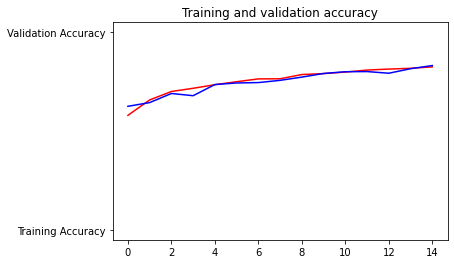

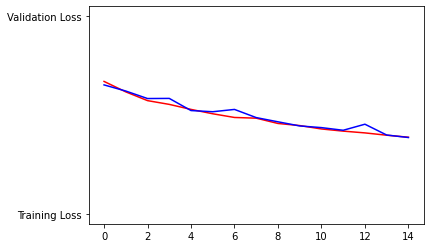

In [16]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

You will probably encounter that the model is overfitting, which means that it is doing a great job at classifying the images in the training set but struggles with new data. This is perfectly fine and you will learn how to mitigate this issue in the upcomming week.

Before closing the assignment, be sure to also download the `history.pkl` file which contains the information of the training history of your model. You can download this file by running the cell below:

In [15]:
def download_history():
  import pickle
  from google.colab import files

  with open('history_augmented.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history_augmented.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You will also need to submit this notebook for grading. To download it, click on the `File` tab in the upper left corner of the screen then click on `Download` -> `Download .ipynb`. You can name it anything you want as long as it is a valid `.ipynb` (jupyter notebook) file.

**Congratulations on finishing this week's assignment!**

You have successfully implemented a convolutional neural network that classifies images of cats and dogs, along with the helper functions needed to pre-process the images!

**Keep it up!**